# **yHills Internship Project**


---




## **Prediction of H1N1 vaccination**
Name- **Ark Raj**

Batch-June-July, 2023






1. Problem definition
2.  Data
3.  EDA
4. Data Preprocessing
5. Model Building
6.  Model selection
7. Hyperparameter tuning



# **1. Problem Definition:**
To predict whether people got the H1N1 vaccine using information from the survey.

# **2. Data**
Dataset is taken from:
Link:https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv

In [91]:
#Importing all required Libraries
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


In [6]:
#Importing Data from Google Drive

In [7]:
from google.colab import drive

In [4]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Loading the data
data_path = '/content/drive/MyDrive/Projects/H1N1_vaccination_Prediction/Data/h1n1_vaccine_prediction.csv'
df = pd.read_csv(data_path)

# Display the first few rows to verify the data has been loaded correctly
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [9]:
df.shape

(26707, 34)

In [10]:
#to get the total number of columns
column_headings = df.columns.tolist()
column_headings

['unique_id',
 'h1n1_worry',
 'h1n1_awareness',
 'antiviral_medication',
 'contact_avoidance',
 'bought_face_mask',
 'wash_hands_frequently',
 'avoid_large_gatherings',
 'reduced_outside_home_cont',
 'avoid_touch_face',
 'dr_recc_h1n1_vacc',
 'dr_recc_seasonal_vacc',
 'chronic_medic_condition',
 'cont_child_undr_6_mnths',
 'is_health_worker',
 'has_health_insur',
 'is_h1n1_vacc_effective',
 'is_h1n1_risky',
 'sick_from_h1n1_vacc',
 'is_seas_vacc_effective',
 'is_seas_risky',
 'sick_from_seas_vacc',
 'age_bracket',
 'qualification',
 'race',
 'sex',
 'income_level',
 'marital_status',
 'housing_status',
 'employment',
 'census_msa',
 'no_of_adults',
 'no_of_children',
 'h1n1_vaccine']

In [12]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


# **3. Exploratory Data Analysis (EDA)**
In this section, we perform Exploratory Data Analysis (EDA) to gain insights and understanding of the dataset. We analyze the distribution of variables, identify missing values, explore correlations, and visualize patterns and trends to inform our data preprocessing and modeling decisions. EDA helps us uncover valuable information about the data and aids in making informed decisions during the entire data analysis process.

## **3.1 Basic Checks of Data**

In [136]:
df.shape

(26707, 25)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [137]:
df["h1n1_vaccine"].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [16]:
df.sex.value_counts()

Female    15858
Male      10849
Name: sex, dtype: int64

In [17]:
# Compare target column with sex column
pd.crosstab(df.h1n1_vaccine, df.sex)

sex,Female,Male
h1n1_vaccine,,
0,12378,8655
1,3480,2194


In [134]:
df.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'race', 'sex',
       'census_msa', 'no_of_adults', 'no_of_children', 'h1n1_vaccine'],
      dtype='object')

In [135]:
# Calculate the percentage of null values for each column
null_percentage = (df.isnull().sum() / len(df)) * 100

# Display the percentage of null values for each column in descending order
print(null_percentage.sort_values(ascending=False))

h1n1_worry                   0.0
is_h1n1_risky                0.0
no_of_children               0.0
no_of_adults                 0.0
census_msa                   0.0
sex                          0.0
race                         0.0
age_bracket                  0.0
sick_from_seas_vacc          0.0
is_seas_risky                0.0
is_seas_vacc_effective       0.0
sick_from_h1n1_vacc          0.0
is_h1n1_vacc_effective       0.0
h1n1_awareness               0.0
is_health_worker             0.0
cont_child_undr_6_mnths      0.0
chronic_medic_condition      0.0
avoid_touch_face             0.0
reduced_outside_home_cont    0.0
avoid_large_gatherings       0.0
wash_hands_frequently        0.0
bought_face_mask             0.0
contact_avoidance            0.0
antiviral_medication         0.0
h1n1_vaccine                 0.0
dtype: float64


In [ ]:
#droping unique_id colum
df.drop(labels=['unique_id'],axis=1,inplace=True)

### **3.2 Data Analysis**

In [143]:
df.shape

(26707, 25)

<Axes: >

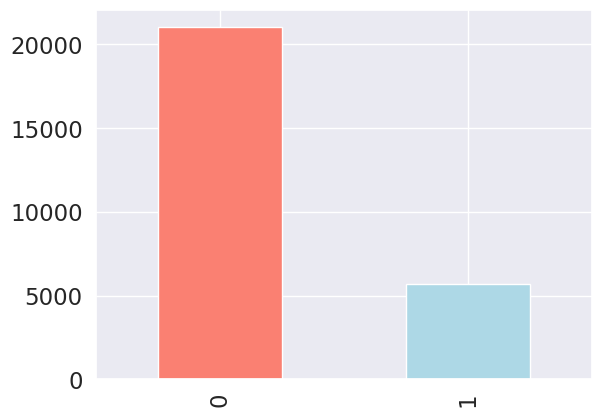

In [139]:
df["h1n1_vaccine"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])

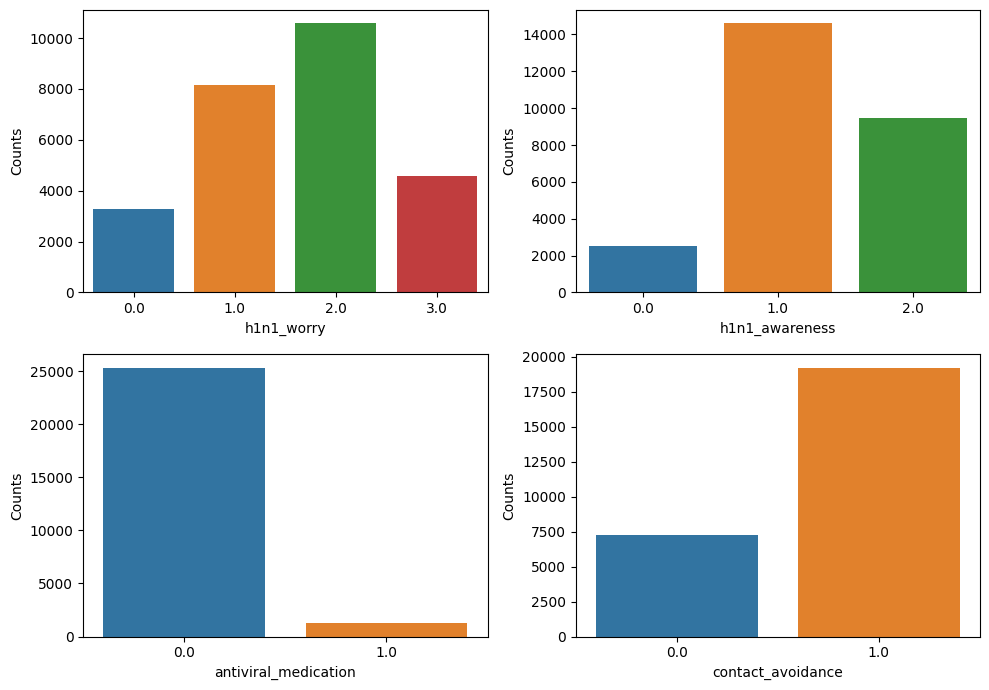

In [29]:
box = df[['h1n1_worry', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance']]
plt.figure(figsize=(10, 7))
for i, column in enumerate(box):
    plt.subplot(2, 2, i+1)  # Create subplots in a 2x2 grid
    sns.countplot(x=column, data=box)
    plt.xlabel(column)
    plt.ylabel('Counts')

plt.tight_layout()  # To ensure proper spacing between subplots
plt.show()


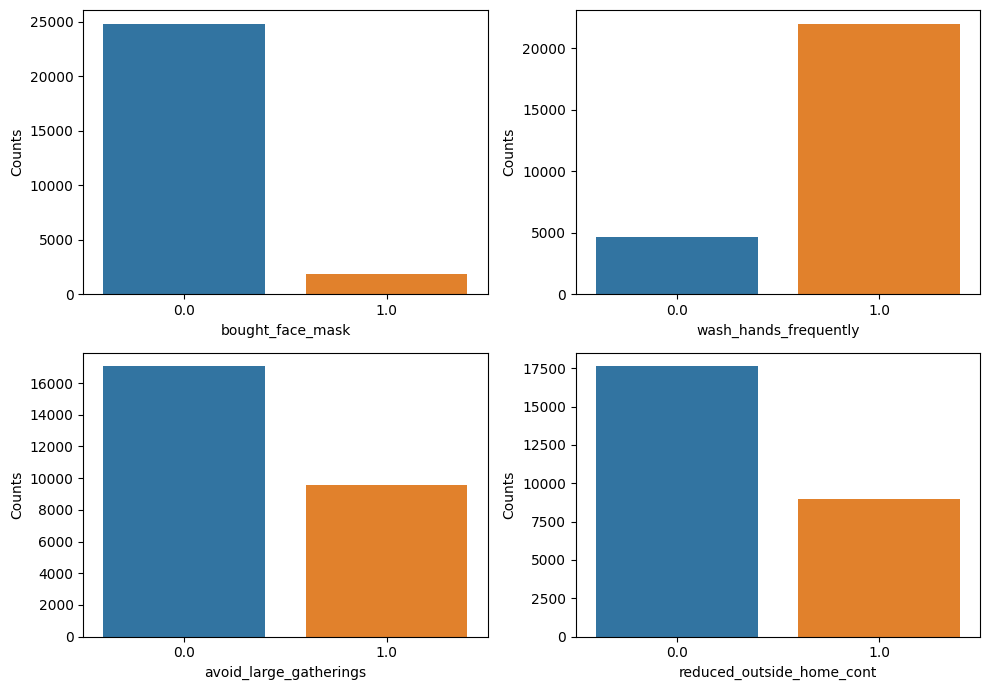

In [30]:
box = df[['bought_face_mask', 'wash_hands_frequently','avoid_large_gatherings', 'reduced_outside_home_cont']]
plt.figure(figsize=(10, 7))
for i, column in enumerate(box):
    plt.subplot(2, 2, i+1)  # Create subplots in a 2x2 grid
    sns.countplot(x=column, data=box)
    plt.xlabel(column)
    plt.ylabel('Counts')

plt.tight_layout()  # To ensure proper spacing between subplots
plt.show()


In [31]:
df.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

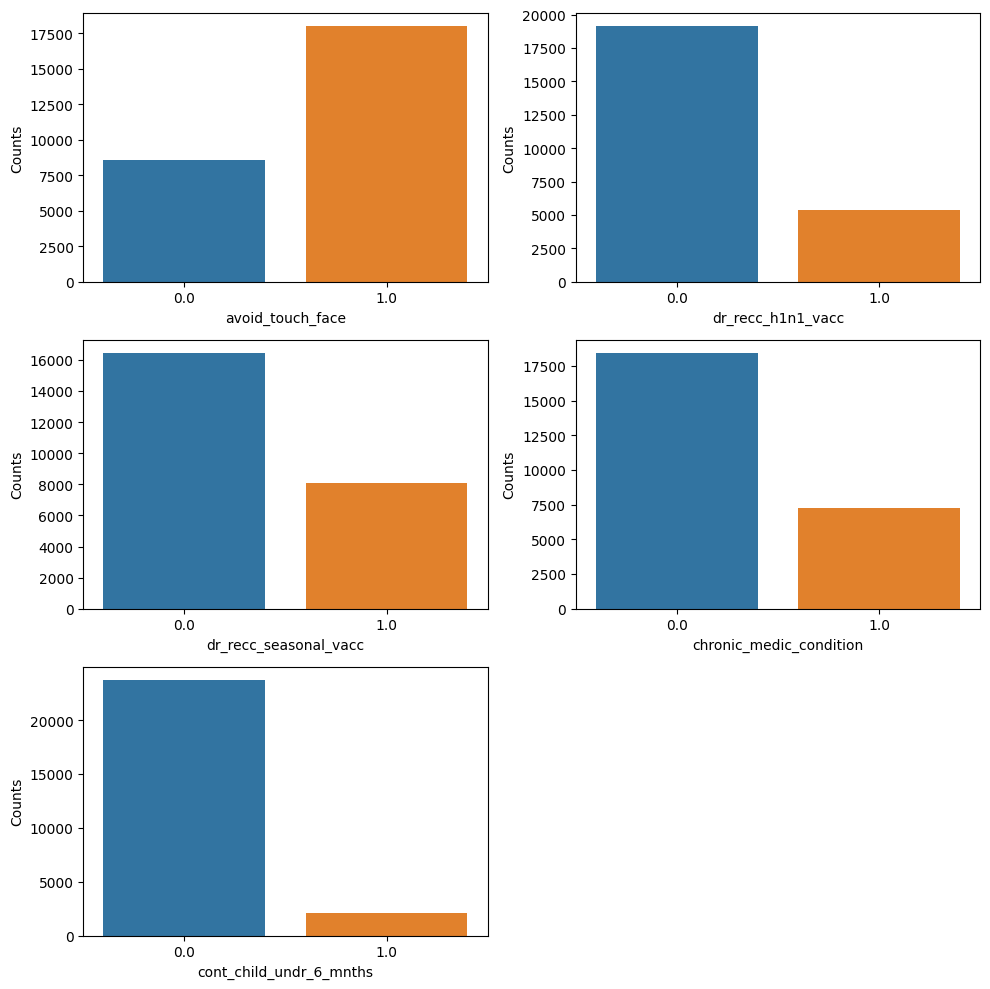

In [32]:
box = df[[ 'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc','chronic_medic_condition', 'cont_child_undr_6_mnths']]
plt.figure(figsize=(10, 10))
for i, column in enumerate(box):
    plt.subplot(3, 2, i+1)  # Create subplots in a 2x2 grid
    sns.countplot(x=column, data=box)
    plt.xlabel(column)
    plt.ylabel('Counts')

plt.tight_layout()  # To ensure proper spacing between subplots
plt.show()


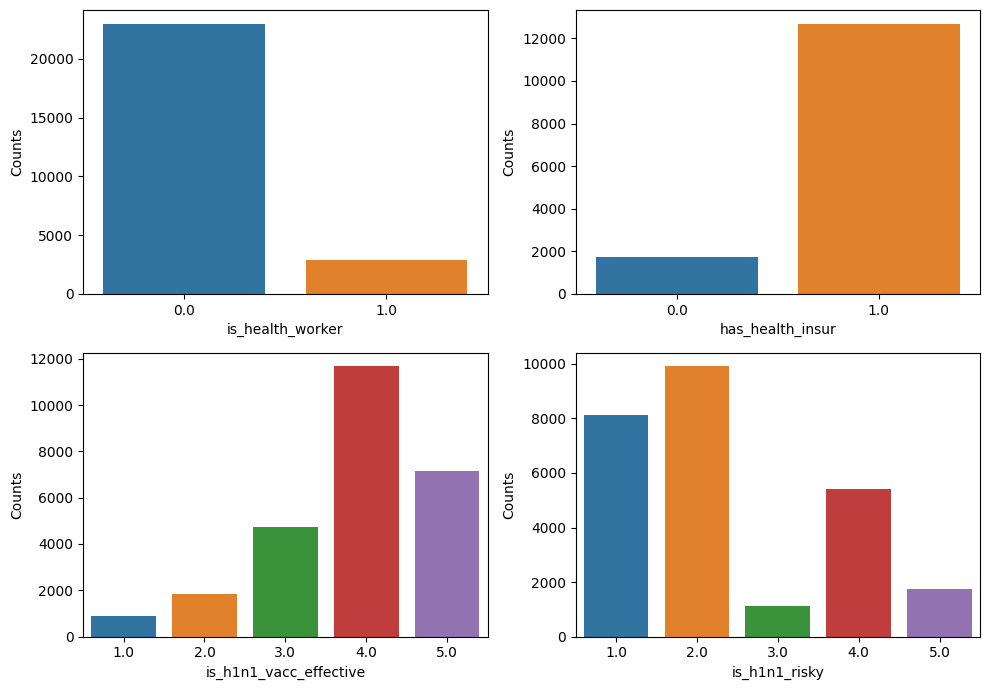

In [33]:
box = df[[   'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective','is_h1n1_risky']]
plt.figure(figsize=(10, 7))
for i, column in enumerate(box):
    plt.subplot(2, 2, i+1)  # Create subplots in a 2x2 grid
    sns.countplot(x=column, data=box)
    plt.xlabel(column)
    plt.ylabel('Counts')

plt.tight_layout()  # To ensure proper spacing between subplots
plt.show()

In [34]:
df.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

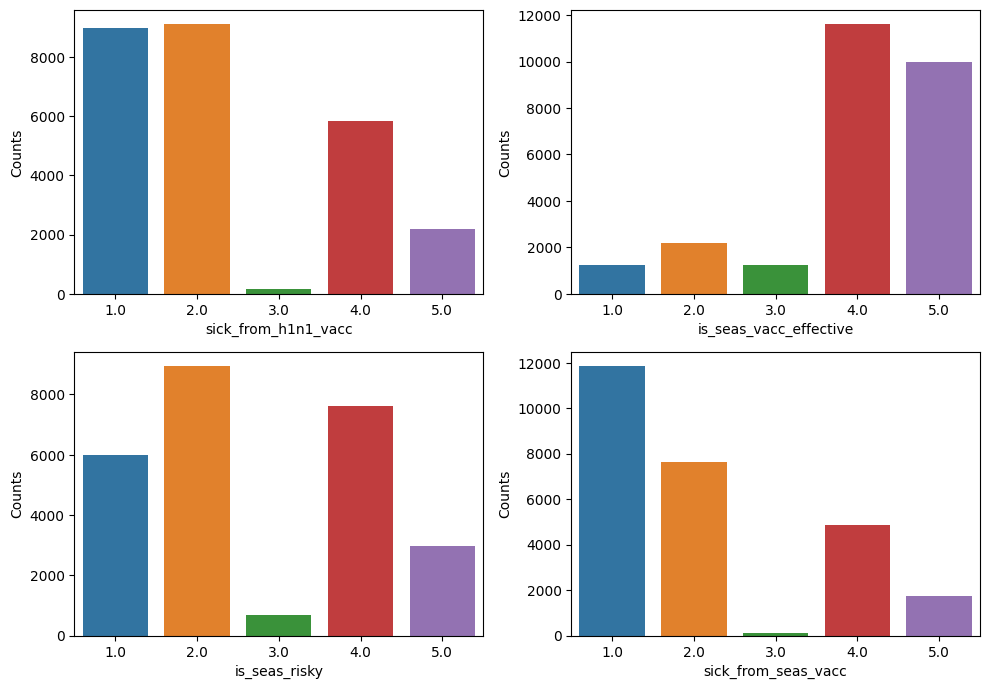

In [35]:
box = df[['sick_from_h1n1_vacc', 'is_seas_vacc_effective','is_seas_risky', 'sick_from_seas_vacc']]
plt.figure(figsize=(10, 7))
for i, column in enumerate(box):
    plt.subplot(2, 2, i+1)  # Create subplots in a 2x2 grid
    sns.countplot(x=column, data=box)
    plt.xlabel(column)
    plt.ylabel('Counts')

plt.tight_layout()  # To ensure proper spacing between subplots
plt.show()

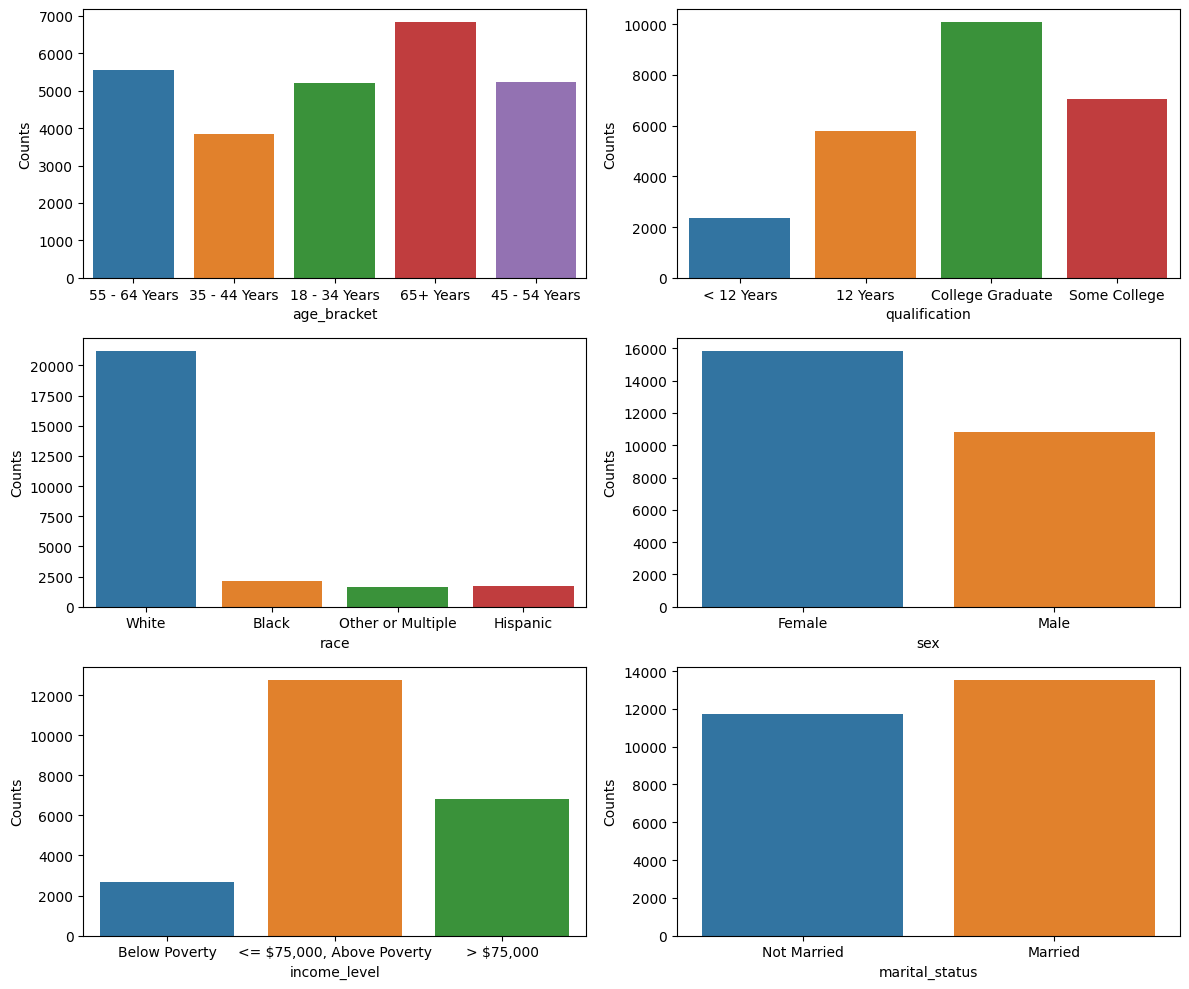

In [36]:
box = df[['age_bracket', 'qualification','race', 'sex', 'income_level', 'marital_status']]
plt.figure(figsize=(12, 10))
for i, column in enumerate(box):
    plt.subplot(3, 2, i+1)  # Create subplots in a 2x2 grid
    sns.countplot(x=column, data=box)
    plt.xlabel(column)
    plt.ylabel('Counts')

plt.tight_layout()  # To ensure proper spacing between subplots
plt.show()

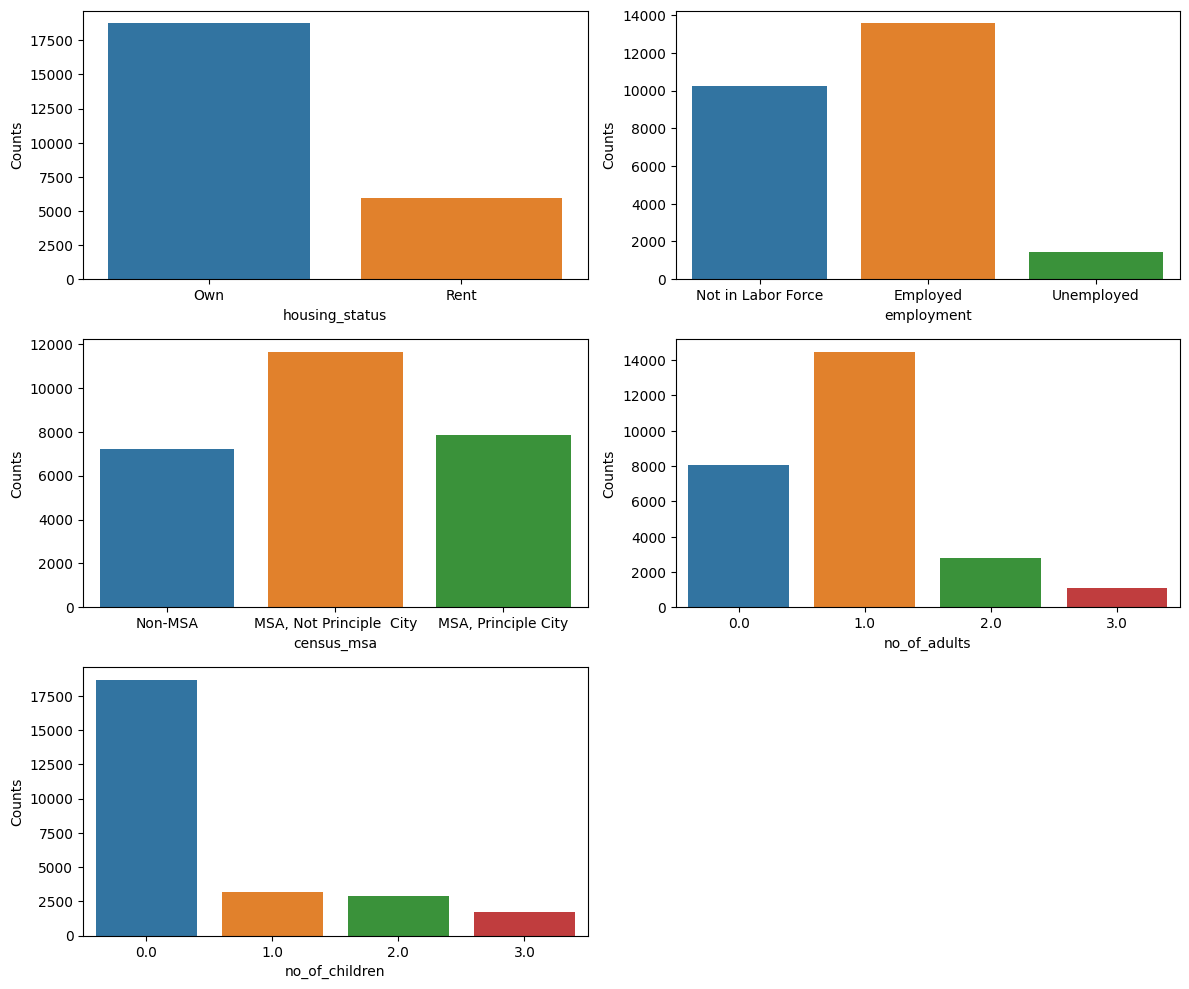

In [37]:
box = df[['housing_status','employment', 'census_msa', 'no_of_adults', 'no_of_children']]
plt.figure(figsize=(12, 10))
for i, column in enumerate(box):
    plt.subplot(3, 2, i+1)  # Create subplots in a 2x2 grid
    sns.countplot(x=column, data=box)
    plt.xlabel(column)
    plt.ylabel('Counts')

plt.tight_layout()  # To ensure proper spacing between subplots
plt.show()

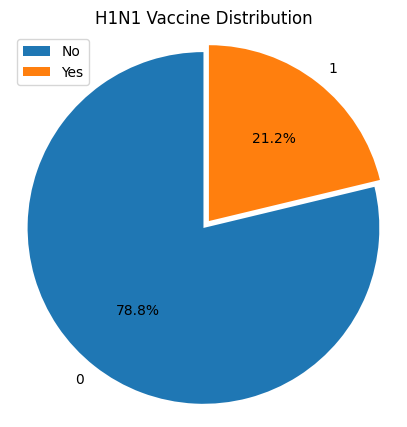

In [38]:
h1n1_vaccine_counts = df['h1n1_vaccine'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(h1n1_vaccine_counts, labels=h1n1_vaccine_counts.index, autopct='%1.1f%%', startangle=90,explode={0,0,0.05})
plt.title('H1N1 Vaccine Distribution')
plt.legend(['No','Yes'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Bivariate Analysis

In [39]:
df.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

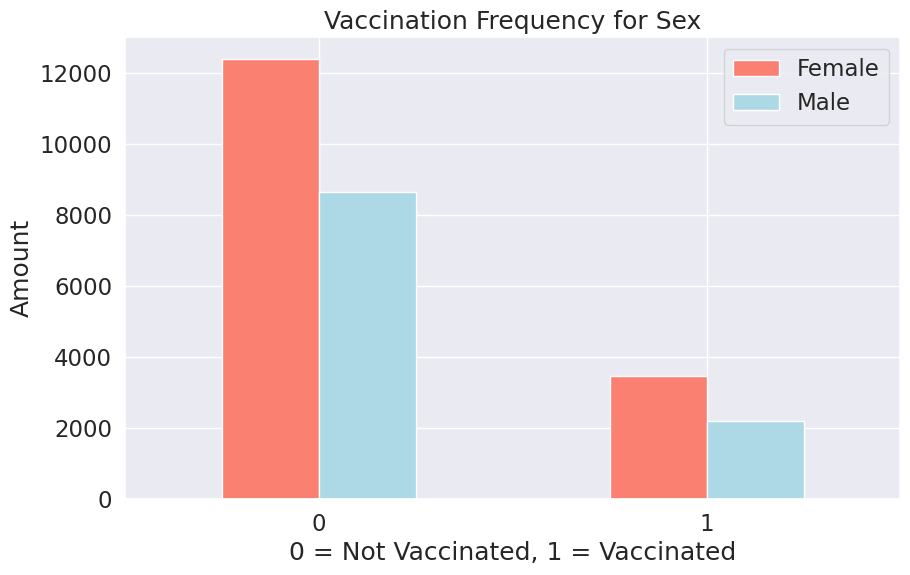

In [140]:
# Create a plot of crosstab
pd.crosstab(df.h1n1_vaccine, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Vaccination Frequency for Sex")
plt.xlabel("0 = Not Vaccinated, 1 = Vaccinated")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

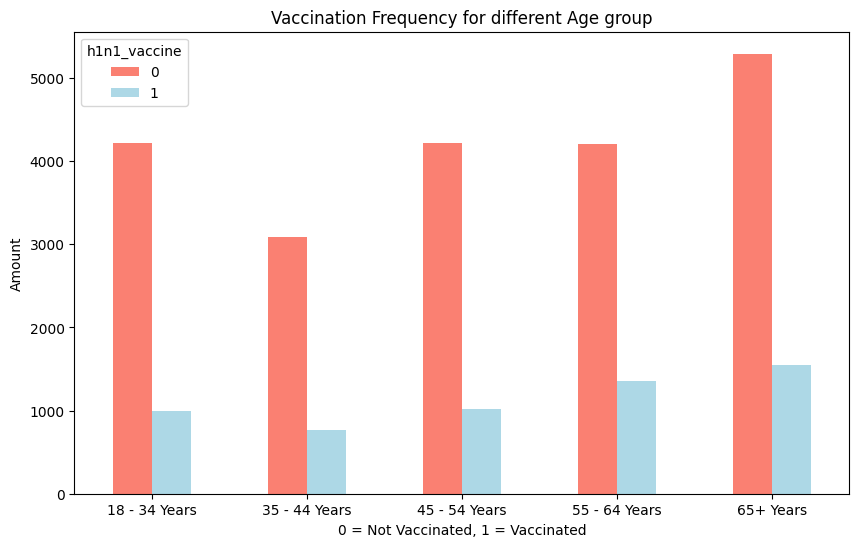

In [40]:
pd.crosstab( df.age_bracket,df.h1n1_vaccine).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])
plt.title("Vaccination Frequency for different Age group")
plt.xlabel("0 = Not Vaccinated, 1 = Vaccinated")
plt.ylabel("Amount")

plt.xticks(rotation=0);

<ipython-input-41-6c7b42172ede>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


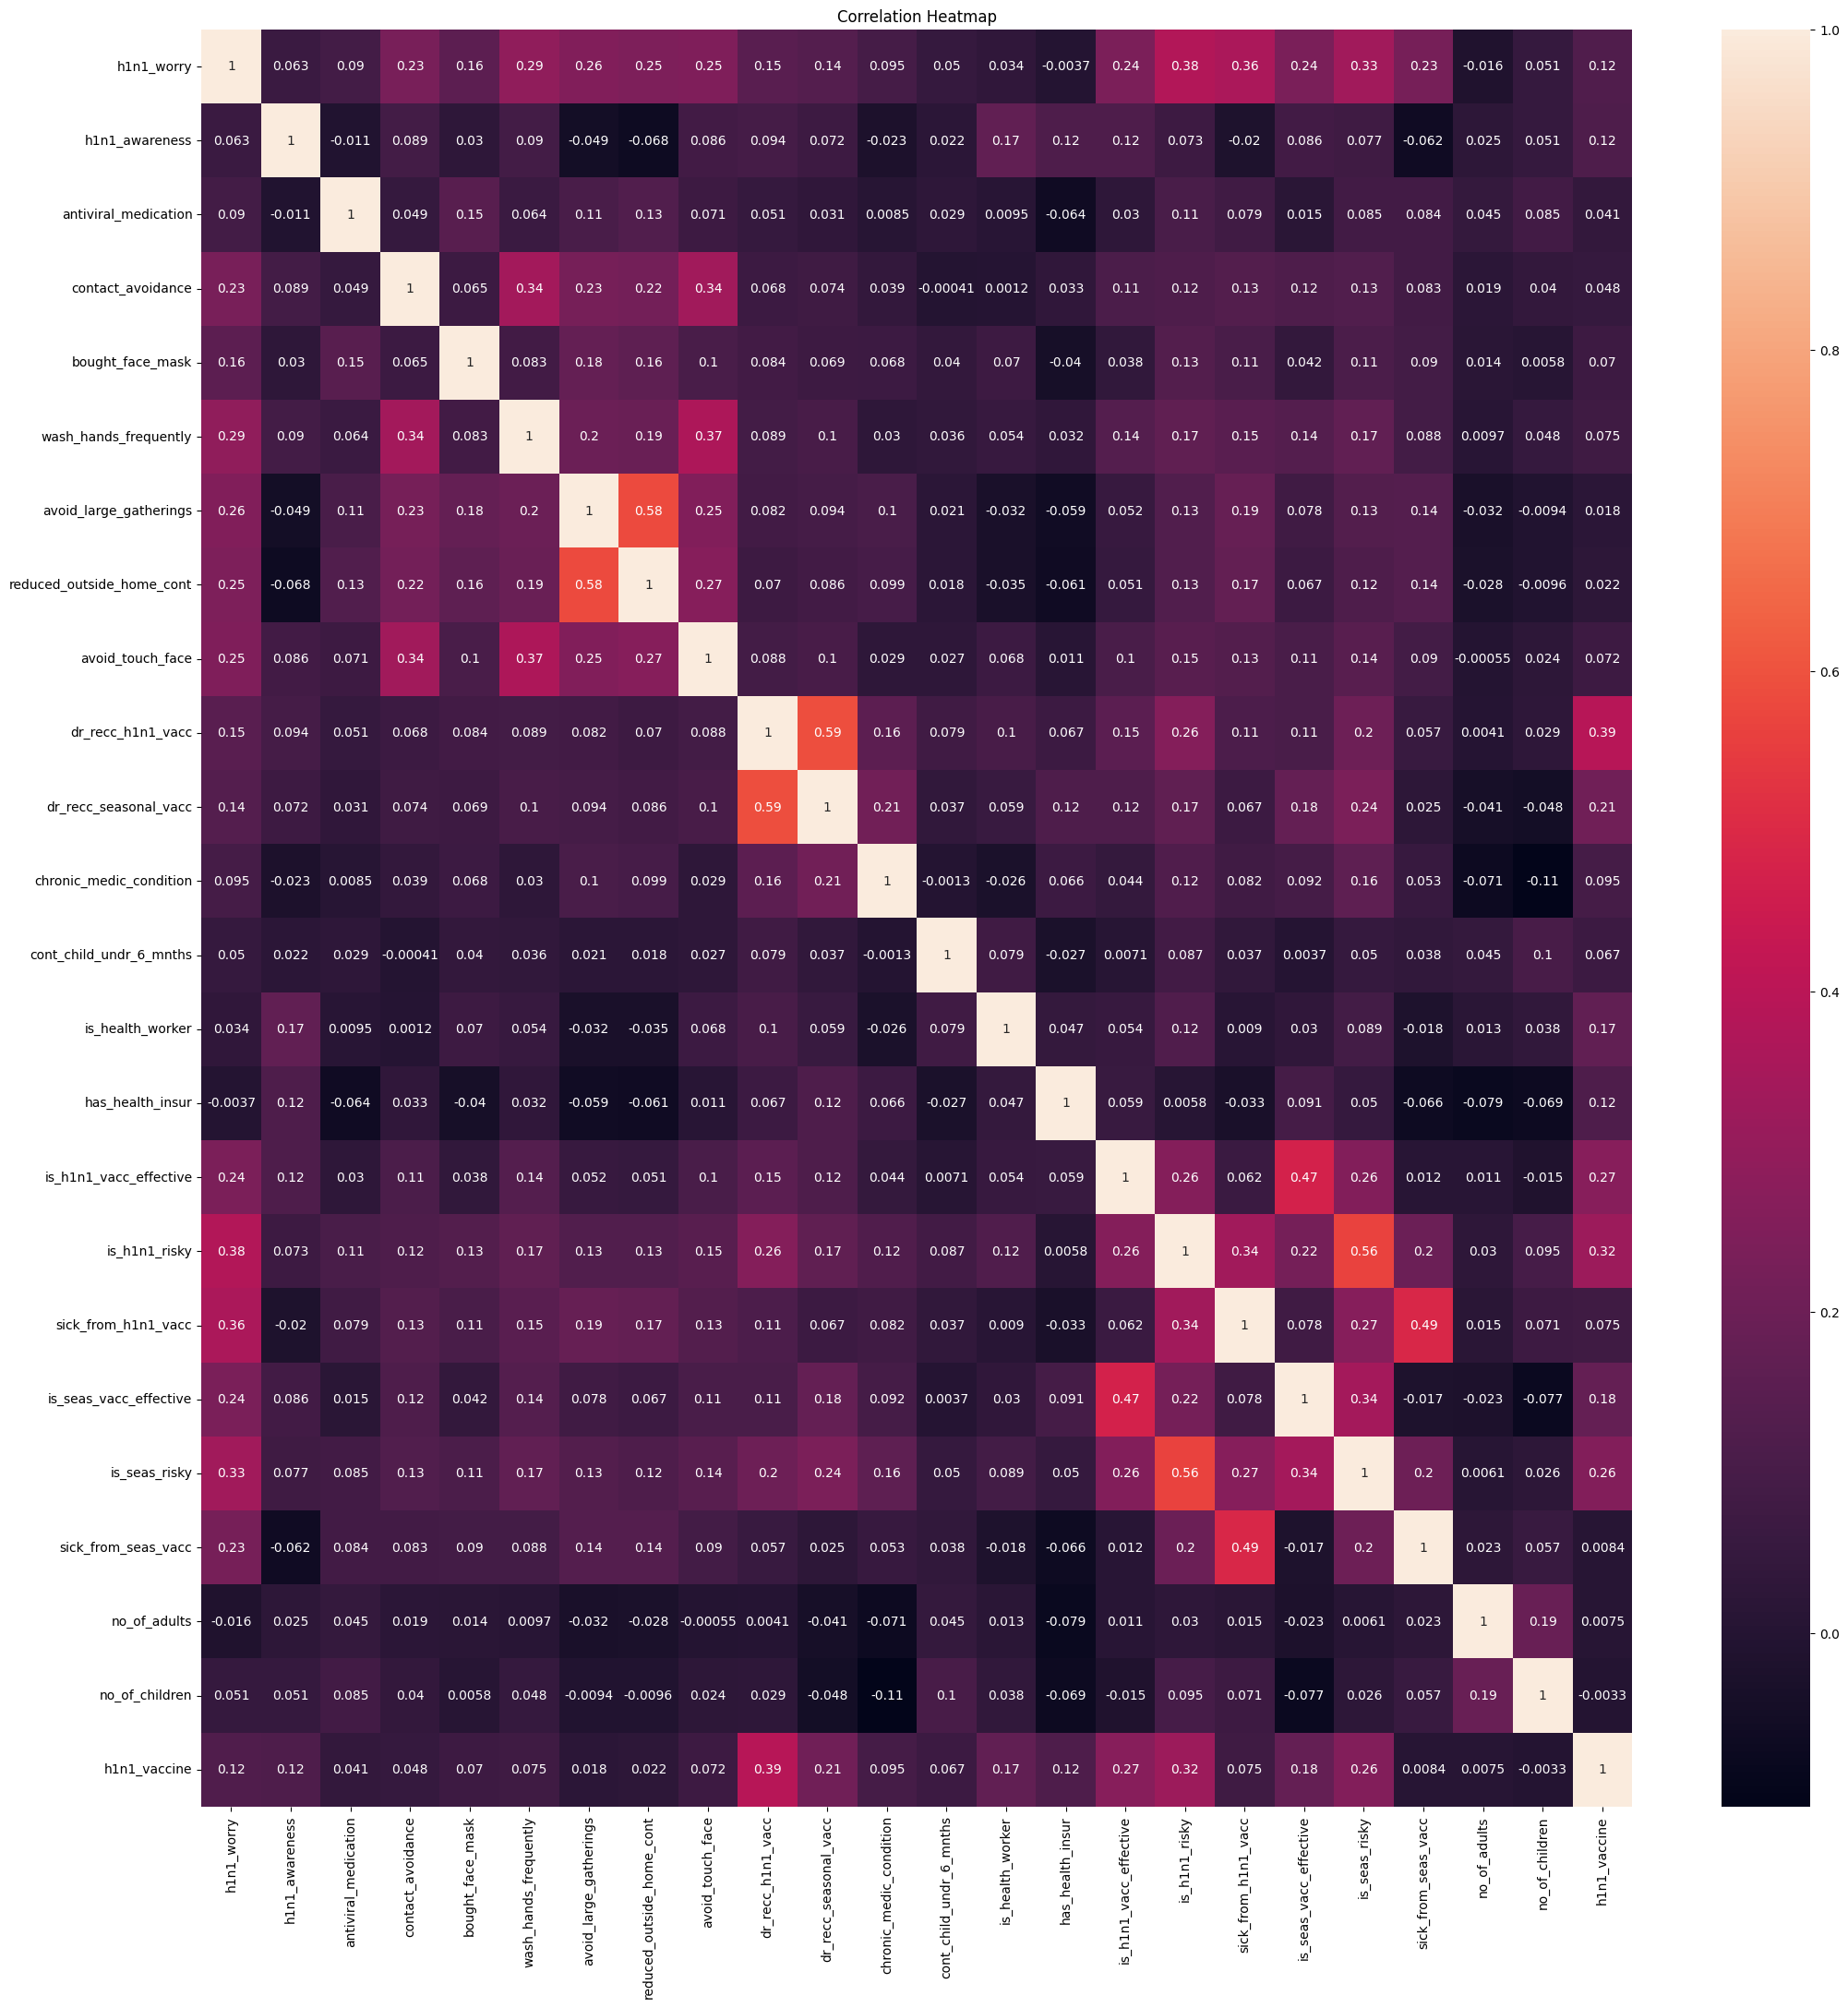

In [41]:
# Check the correlation between features and the target variable (assuming binary classification)
corr_matrix = df.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

# **4. Data Preprocessing**
Data preprocessing involves cleaning, transforming, and organizing raw data to make it suitable for analysis and modeling, addressing issues such as missing values, normalization, encoding categorical variables, and feature scaling



## **4.1 Handling missing data**

In [42]:
# Check for missing values
print(df.isnull().sum())

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [43]:
# Calculate the percentage of null values for each column
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage


h1n1_worry                    0.344479
h1n1_awareness                0.434343
antiviral_medication          0.265848
contact_avoidance             0.778822
bought_face_mask              0.071142
wash_hands_frequently         0.157262
avoid_large_gatherings        0.325757
reduced_outside_home_cont     0.307036
avoid_touch_face              0.479275
dr_recc_h1n1_vacc             8.087767
dr_recc_seasonal_vacc         8.087767
chronic_medic_condition       3.635751
cont_child_undr_6_mnths       3.070356
is_health_worker              3.010447
has_health_insur             45.957989
is_h1n1_vacc_effective        1.464036
is_h1n1_risky                 1.452803
sick_from_h1n1_vacc           1.479013
is_seas_vacc_effective        1.729884
is_seas_risky                 1.924589
sick_from_seas_vacc           2.010709
age_bracket                   0.000000
qualification                 5.268282
race                          0.000000
sex                           0.000000
income_level             

Droping colums having more than 5% missing value data

In [44]:
df.drop(labels=['has_health_insur','qualification','dr_recc_h1n1_vacc','dr_recc_seasonal_vacc','income_level','marital_status','housing_status','employment'],axis=1,inplace=True)

In [45]:
null_percentage = (df.isnull().sum() / len(df)) * 100
null_percentage

h1n1_worry                   0.344479
h1n1_awareness               0.434343
antiviral_medication         0.265848
contact_avoidance            0.778822
bought_face_mask             0.071142
wash_hands_frequently        0.157262
avoid_large_gatherings       0.325757
reduced_outside_home_cont    0.307036
avoid_touch_face             0.479275
chronic_medic_condition      3.635751
cont_child_undr_6_mnths      3.070356
is_health_worker             3.010447
is_h1n1_vacc_effective       1.464036
is_h1n1_risky                1.452803
sick_from_h1n1_vacc          1.479013
is_seas_vacc_effective       1.729884
is_seas_risky                1.924589
sick_from_seas_vacc          2.010709
age_bracket                  0.000000
race                         0.000000
sex                          0.000000
census_msa                   0.000000
no_of_adults                 0.932340
no_of_children               0.932340
h1n1_vaccine                 0.000000
dtype: float64

In [46]:
df.isnull().sum()

h1n1_worry                    92
h1n1_awareness               116
antiviral_medication          71
contact_avoidance            208
bought_face_mask              19
wash_hands_frequently         42
avoid_large_gatherings        87
reduced_outside_home_cont     82
avoid_touch_face             128
chronic_medic_condition      971
cont_child_undr_6_mnths      820
is_health_worker             804
is_h1n1_vacc_effective       391
is_h1n1_risky                388
sick_from_h1n1_vacc          395
is_seas_vacc_effective       462
is_seas_risky                514
sick_from_seas_vacc          537
age_bracket                    0
race                           0
sex                            0
census_msa                     0
no_of_adults                 249
no_of_children               249
h1n1_vaccine                   0
dtype: int64

**Replacing all NaN values with maximum occuring values**

In [47]:
df.h1n1_worry.value_counts()

2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_worry, dtype: int64

In [48]:
df.loc[df['h1n1_worry'].isnull(),'h1n1_worry']=2.0

In [49]:
df.h1n1_awareness.value_counts()

1.0    14598
2.0     9487
0.0     2506
Name: h1n1_awareness, dtype: int64

In [50]:
df.loc[df['h1n1_awareness'].isnull(),'h1n1_awareness']=1.0

In [51]:
def fillna_with_max_occurrence(df):
    for column in df.columns:
        max_occurrence_value = df[column].value_counts().idxmax()
        df.loc[df[column].isnull(), column] = max_occurrence_value
fillna_with_max_occurrence(df)

In [52]:
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
race                         0
sex                          0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: int64

**Now there are NO Null values**

In [53]:
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,...,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,race,sex,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,1.0,2.0,55 - 64 Years,White,Female,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,4.0,2.0,4.0,35 - 44 Years,White,Male,"MSA, Not Principle City",0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4.0,1.0,2.0,18 - 34 Years,White,Male,"MSA, Not Principle City",2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,5.0,4.0,1.0,65+ Years,White,Female,"MSA, Principle City",0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3.0,1.0,4.0,45 - 54 Years,White,Female,"MSA, Not Principle City",1.0,0.0,0


In [54]:
df.shape

(26707, 25)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26707 non-null  float64
 1   h1n1_awareness             26707 non-null  float64
 2   antiviral_medication       26707 non-null  float64
 3   contact_avoidance          26707 non-null  float64
 4   bought_face_mask           26707 non-null  float64
 5   wash_hands_frequently      26707 non-null  float64
 6   avoid_large_gatherings     26707 non-null  float64
 7   reduced_outside_home_cont  26707 non-null  float64
 8   avoid_touch_face           26707 non-null  float64
 9   chronic_medic_condition    26707 non-null  float64
 10  cont_child_undr_6_mnths    26707 non-null  float64
 11  is_health_worker           26707 non-null  float64
 12  is_h1n1_vacc_effective     26707 non-null  float64
 13  is_h1n1_risky              26707 non-null  flo

## **4.2. Coverting Categorical data to numerical data**

In [56]:

#convert categorical data to numerical data using label encoder
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
df.age_bracket=lc.fit_transform(df.age_bracket)
df.race=lc.fit_transform(df.race)
df.sex=lc.fit_transform(df.sex)
df.census_msa=lc.fit_transform(df.census_msa)

In [57]:
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,chronic_medic_condition,...,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,race,sex,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,1.0,2.0,3,3,0,2,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,4.0,2.0,4.0,1,3,1,0,0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4.0,1.0,2.0,0,3,1,0,2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,5.0,4.0,1.0,4,3,0,1,0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3.0,1.0,4.0,2,3,0,0,1.0,0.0,0


In [58]:
df.shape

(26707, 25)

## **4.3 Feature Selection**
**Heatmap correlation**

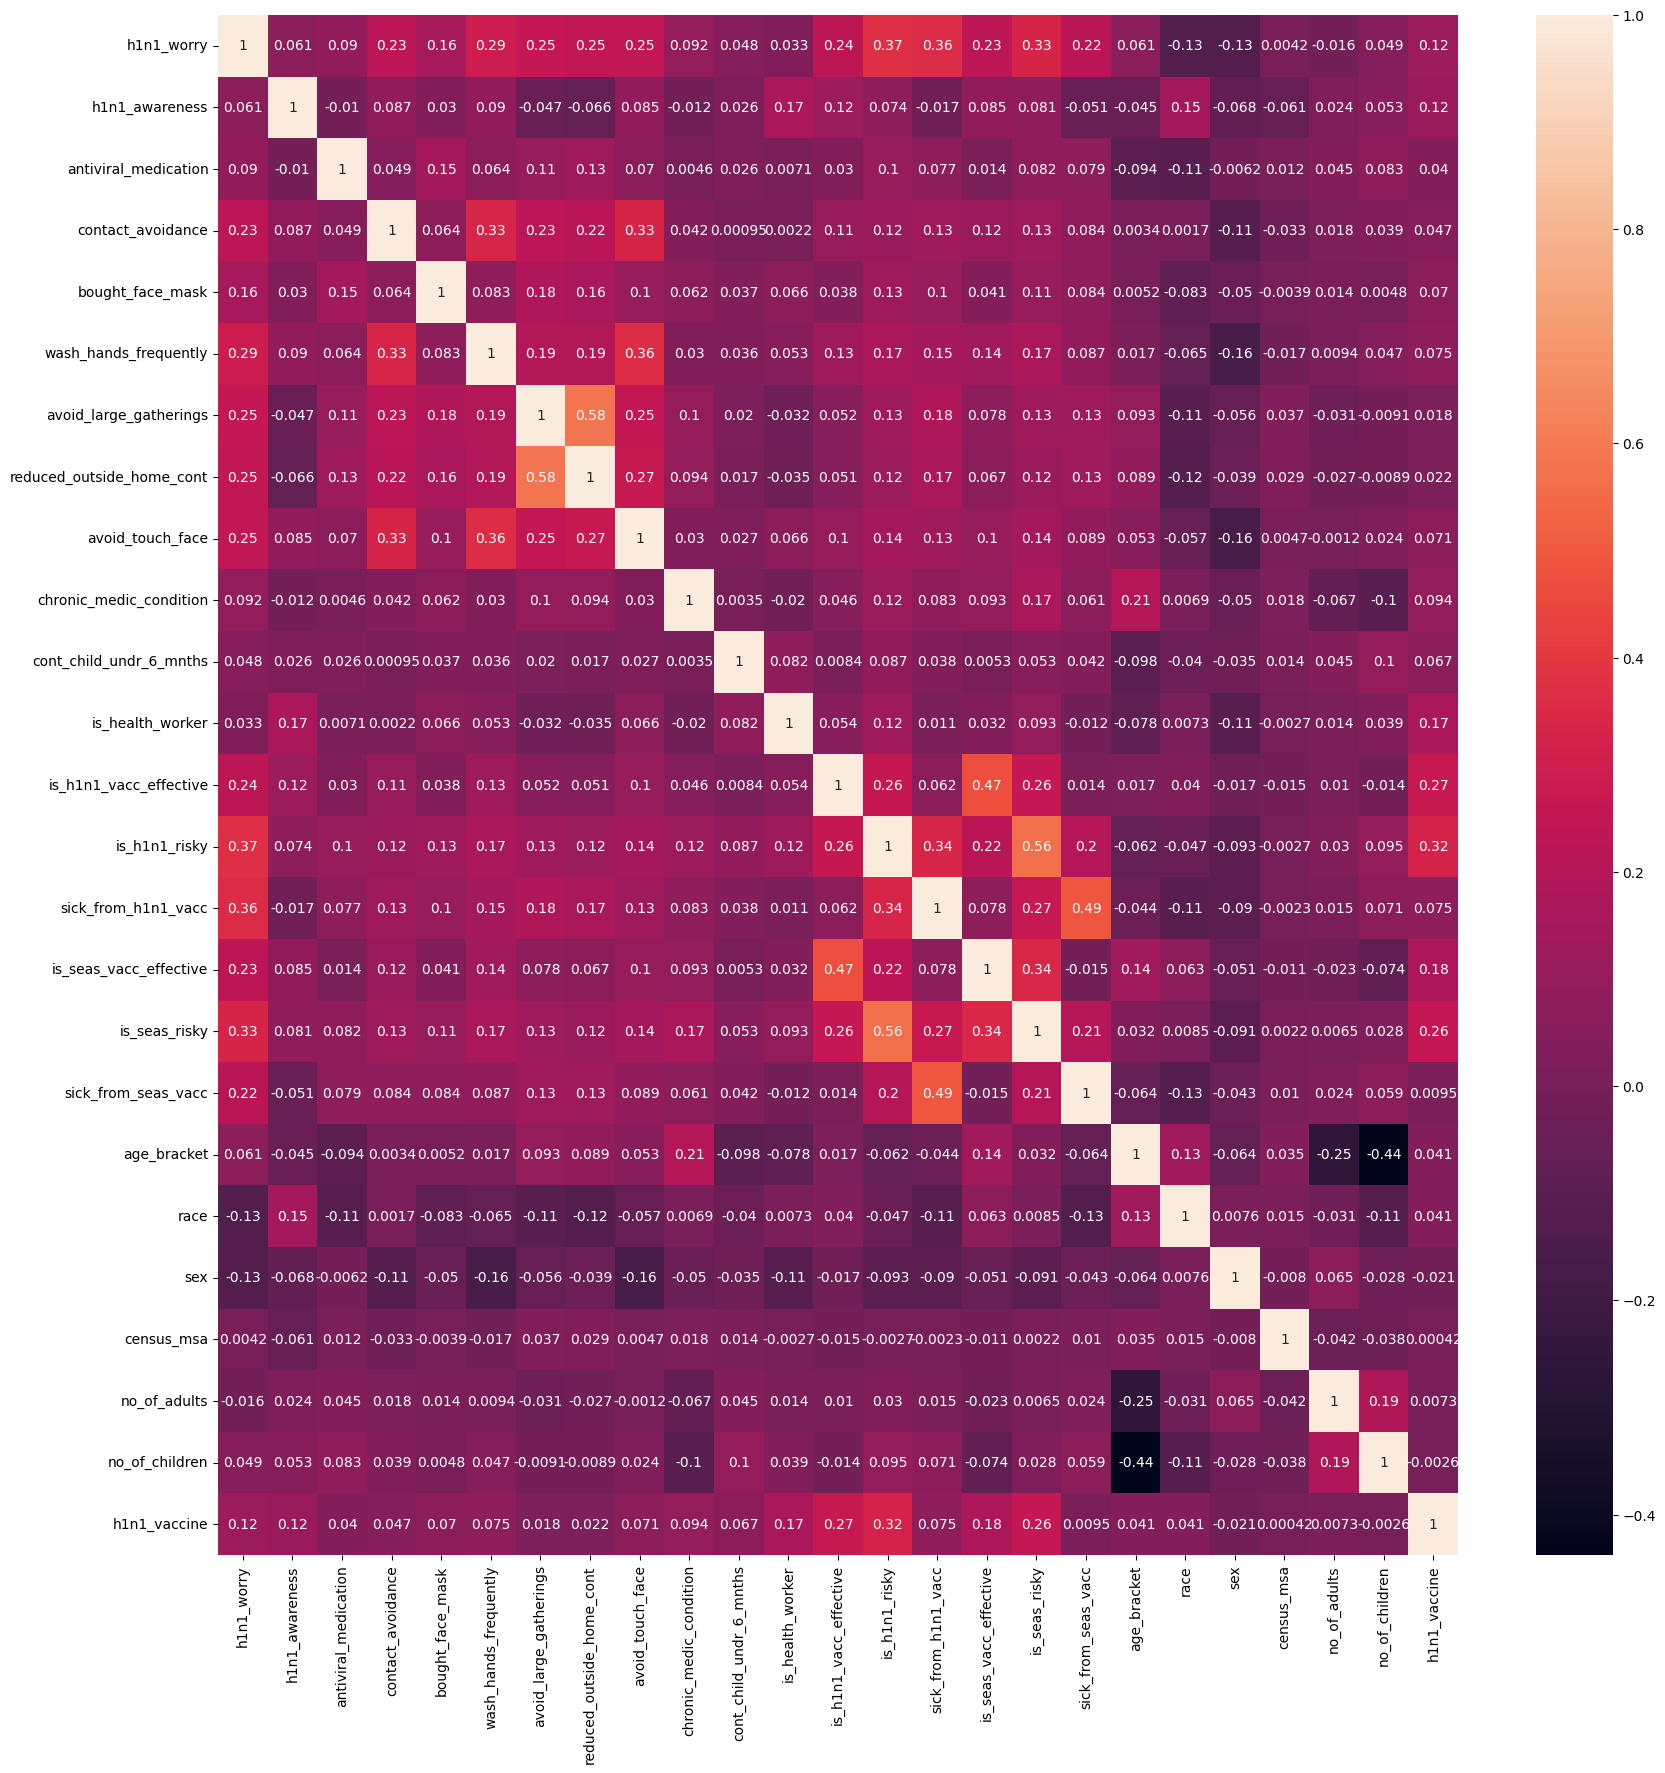

In [59]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

## **4.4 Data under sampling**
Since the data in unbalanced so we have to perform undersampling to make the data balanced

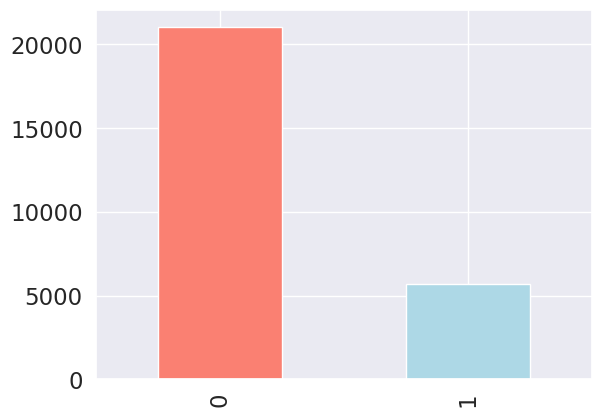

In [144]:
#Before Unersampling
df["h1n1_vaccine"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

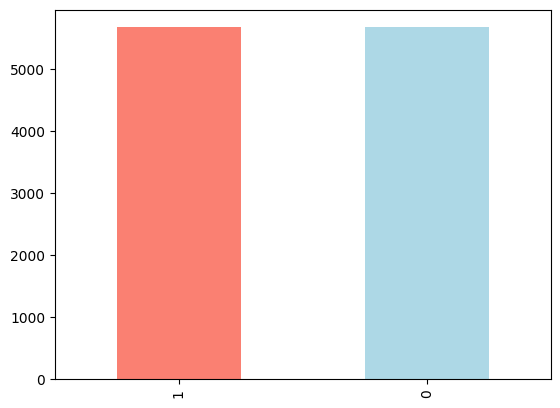

In [61]:
#After Undersampling
h1n1_vaccine=len(df[df['h1n1_vaccine']==1])
no_h1n1_vaccine_indices=df[df.h1n1_vaccine==0].index
random_indices=np.random.choice(no_h1n1_vaccine_indices,h1n1_vaccine,replace=False)
h1n1_vaccine_indices=df[df.h1n1_vaccine==1].index
under_sample_indices=np.concatenate([h1n1_vaccine_indices,random_indices])
under_sample=df.loc[under_sample_indices]
under_sample["h1n1_vaccine"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

**Now the data is balanced**

In [62]:
under_sample.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'race', 'sex',
       'census_msa', 'no_of_adults', 'no_of_children', 'h1n1_vaccine'],
      dtype='object')

## **5. Model Building**

In [63]:
#droping thw columns with high correlation and least important
X=under_sample.drop(columns=['h1n1_vaccine','is_seas_risky','age_bracket','is_seas_vacc_effective','census_msa','sick_from_seas_vacc','reduced_outside_home_cont','no_of_children'])
y=under_sample['h1n1_vaccine']

**Spliting the data in train and test sets**

In [64]:
from sklearn.model_selection import train_test_split
# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables
                                                    y, # dependent variable
                                                    test_size = 0.2) # percentage of data to use for test set

### **5.1 Model Selection**
Different Machine Learning models to be used are:
*   Logistic Regression
*  Random Forest
*   KNN
*   Naive Bayes
*   SVM
*   Decison Tree
*   Gradient Boosting
*   XGBoost








In [74]:
# Putting above models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "Gaussian Naive Bayes": GaussianNB(),
          "SVM":SVC(),
          "Decision Tree": DecisionTreeClassifier(),
          "Gradient Boosting":GradientBoostingClassifier(),
          "XGBoost":XGBClassifier(),
          }

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """

    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)*100
    return model_scores

## **5.2 Model Evaluation**
Finding best model based on accuracy

In [75]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'KNN': 66.74008810572687,
 'Logistic Regression': 71.23348017621144,
 'Random Forest': 67.66519823788546,
 'Gaussian Naive Bayes': 67.66519823788546,
 'SVM': 71.45374449339207,
 'Decision Tree': 62.643171806167395,
 'Gradient Boosting': 72.15859030837004,
 'XGBoost': 68.5022026431718}

Text(0.5, 1.0, 'Accuracy Scores for Different Models')

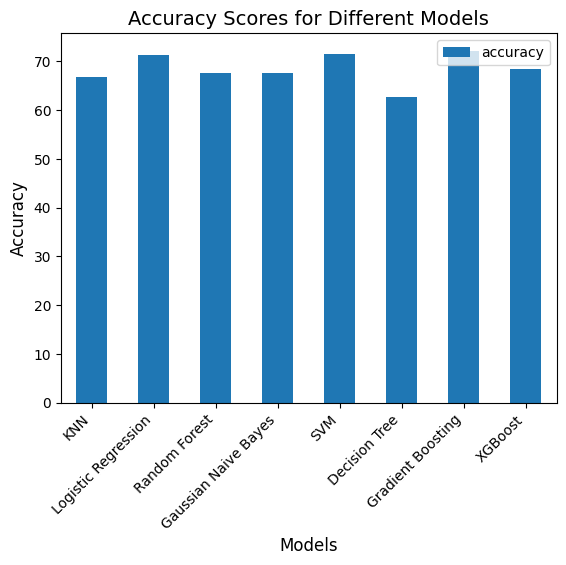

In [79]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();
plt.xticks(rotation=45, ha='right')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy Scores for Different Models', fontsize=14)

Since the Models: **Logistic Regression,SVM and Gradient Boosting** performs better.

**Selecting Logistic Regression and Implementing**

In [80]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
Y_pred=logreg.predict(X_test)
acc_log=round(logreg.score(X_test,y_test)*100,2)
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1110
           1       0.73      0.69      0.71      1160

    accuracy                           0.71      2270
   macro avg       0.71      0.71      0.71      2270
weighted avg       0.71      0.71      0.71      2270



In [82]:
#Confusion matrix
pd.crosstab(y_test,Y_pred)

col_0,0,1
h1n1_vaccine,,
0,812,298
1,355,805


## **6. Hyperparameter Tuning Logistic Regression Model using RandomizedSearchCV**
optimizing the model's hyperparameters to achieve better performance.

In [112]:
import warnings
random_grid= {
        'penalty': ['l1','l2','elasticnet', 'none'],
        'C': [0.01, 0.1, 1.0, 10.0],
        'solver': ['liblinear', 'saga'],
        'max_iter': [100]
    }
n_iter=100
cv=3
logreg1=LogisticRegression()
logreg_cv=RandomizedSearchCV(estimator=logreg1, param_distributions=random_grid,n_iter=n_iter, cv=cv, random_state=42,verbose=True,scoring='f1')
with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        logreg_cv.fit(X_train,y_train)
        logreg_best_params=logreg_cv.best_params_
print(f"Best Parameters: {logreg_best_params}")


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters: {'solver': 'saga', 'penalty': 'l2', 'max_iter': 100, 'C': 0.01}


In [113]:
#Using the hypertuned model
logreg2=LogisticRegression(solver='saga',penalty='l2',max_iter=100,C=0.01)
logreg2.fit(X_train,y_train)
y_predict=logreg2.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72      1110
           1       0.74      0.69      0.71      1160

    accuracy                           0.72      2270
   macro avg       0.72      0.72      0.72      2270
weighted avg       0.72      0.72      0.72      2270



In [115]:
logreg2.score(X_test, y_test)*100

71.54185022026431

# **7. Evaluating our tuned machine learning classifier, beyond accuracy**


In [116]:
#CONFUSION MATRIX
pd.crosstab(y_test,y_predict)

col_0,0,1
h1n1_vaccine,,
0,821,289
1,357,803


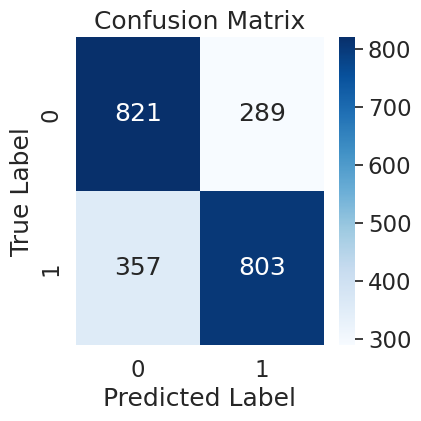

In [132]:
# Plotting confusion matrix
def plot_confusion_matrix(y_test, y_predict,  title='Confusion Matrix', cmap='Blues'):
    conf_matrix = confusion_matrix(y_test, y_predict)
    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap,
                )
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

plot_confusion_matrix(y_test, y_predict)

In [149]:
#saving model
import joblib

# Assuming you have trained and fitted your Logistic Regression model and stored it in 'logreg_model'
model_filename = 'h1n1_vacc_logreg_model.pkl'
joblib.dump(logreg2,model_filename)

print("Logistic Regression model has been saved as", model_filename)


Logistic Regression model has been saved as h1n1_vacc_logreg_model.pkl
